In [1]:
import pandas as pd
import os
import cv2

train_csv = 'C:/Users/cdisb/Desktop/plant-pathology-2020-fgvc7/train.csv'
df_train = pd.read_csv(train_csv, index_col=0)
class_names = list(df_train)
print(class_names)
print(df_train.shape)
df_train.head()


['healthy', 'multiple_diseases', 'rust', 'scab']
(1821, 4)


,healthy,multiple_diseases,rust,scab
image_id,,,,
Train_0,0,0,0,1
Train_1,0,1,0,0
Train_2,1,0,0,0
Train_3,0,0,1,0
Train_4,1,0,0,0


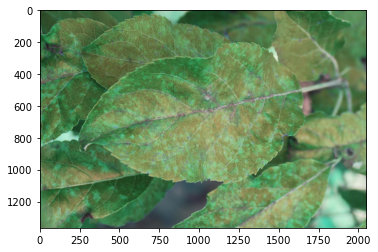

In [5]:
import matplotlib.pyplot as plt
pathTest = 'C:/Users/cdisb/Desktop/plant-pathology-2020-fgvc7/images'
images = []
for filename in os.listdir(pathTest):
    img = cv2.imread(os.path.join(pathTest,filename))
    if img is not None:
        images.append(img)

example_image = images[3]
plt.figure()
plt.imshow(example_image)
plt.show()

In [2]:
import tensorflow as tf
batch_size = 64
img_height = 180
img_width = 180
data_dir = 'C:/Users/cdisb/Desktop/plant-pathology-2020-fgvc7/Train1'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  color_mode='rgb',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1821 files belonging to 2 classes.
Using 1457 files for training.




 --  validation_split : Optional float between 0 and 1, fraction of data to reserve for validation.
 
 --  data_dir : Directory where the data is located.
 
 -- color_mode : One of "grayscale", "rgb", "rgba". Default: "rgb".
 
 -- subset : One of "training" or "validation". Only used if validation_split is set.
 
 -- seed : Optional random seed for shuffling and transformations.
 
 -- image_size : Size to resize images to after they are read from disk.
 
 -- batch_size : Size of the batches of data. Default: 32. 



In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1821 files belonging to 2 classes.
Using 364 files for validation.


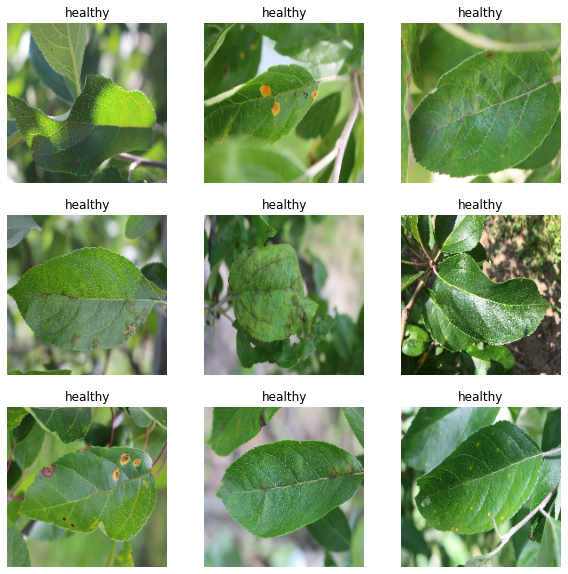

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [4]:
num_classes = 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])



-- Rescaling performs the process by converting the RGB image we receive to grayscale.

-- The model is initialized with Conv.layer. 32 pieces of 3x3 filters were used.

-- The pooling layer  aims to reduce dimensionality. In this way, both the required processing power is reduced and the unnecessary features that are caught are ignored and more important features are focused on.

-- Flattening Layer, The last and most important layer is to prepare the data at the input of the Fully Connected Layer. Generally, neural networks take input data from a one-dimensional array.

-- Dense is one of the most used classes. It provides the transition of neurons or nodes between layers with dense. In other words, it allows neurons from one layer to be connected to the next layer as input. There are two Dense with 128 neurons activation function relu and 4 (num_classes) neurons.



In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_fn,
              optimizer='rmsprop',
              metrics=['accuracy'])

!!The main idea of Root Mean Square Propagation is that the gradient is normalized by the square root of the mean of squares.

In [6]:
h = model.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
23/23 [==============================] - 11s 460ms/step - loss: 1.2962 - accuracy: 0.4928 - val_loss: 0.8617 - val_accuracy: 0.5082
Epoch 2/15
23/23 [==============================] - 12s 479ms/step - loss: 0.7416 - accuracy: 0.4798 - val_loss: 0.7117 - val_accuracy: 0.5082
Epoch 3/15
23/23 [==============================] - 11s 444ms/step - loss: 0.7546 - accuracy: 0.4900 - val_loss: 0.7616 - val_accuracy: 0.5082
Epoch 4/15
23/23 [==============================] - 11s 473ms/step - loss: 0.7299 - accuracy: 0.4935 - val_loss: 0.7275 - val_accuracy: 0.4918
Epoch 5/15
23/23 [==============================] - 11s 460ms/step - loss: 0.7025 - accuracy: 0.5408 - val_loss: 0.7208 - val_accuracy: 0.4835
Epoch 6/15
23/23 [==============================] - 11s 468ms/step - loss: 0.7362 - accuracy: 0.5607 - val_loss: 0.7136 - val_accuracy: 0.4918
Epoch 7/15
23/23 [==============================] - 11s 457ms/step - loss: 0.6876 - accuracy: 0.6060 - val_loss: 0.7825 - val_accuracy: 0.4945

In [84]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

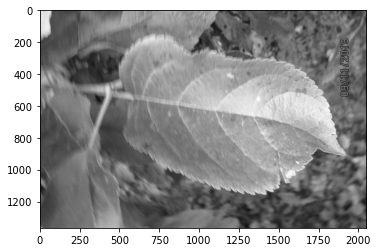

In [94]:
example_image = gray
plt.figure()
plt.imshow((example_image),cmap="gray")
plt.show()

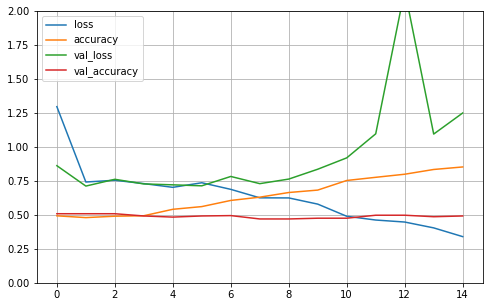

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) 
plt.show()

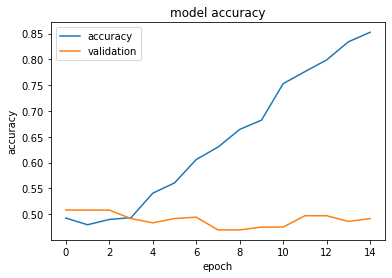

In [10]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation'], loc='upper left')
plt.show()

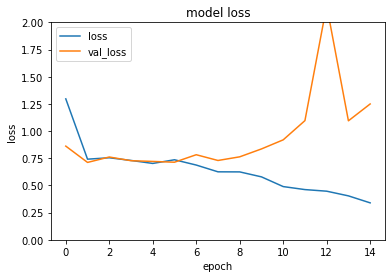

In [11]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.gca().set_ylim(0, 2) 
plt.show()